## Gagan Chordia
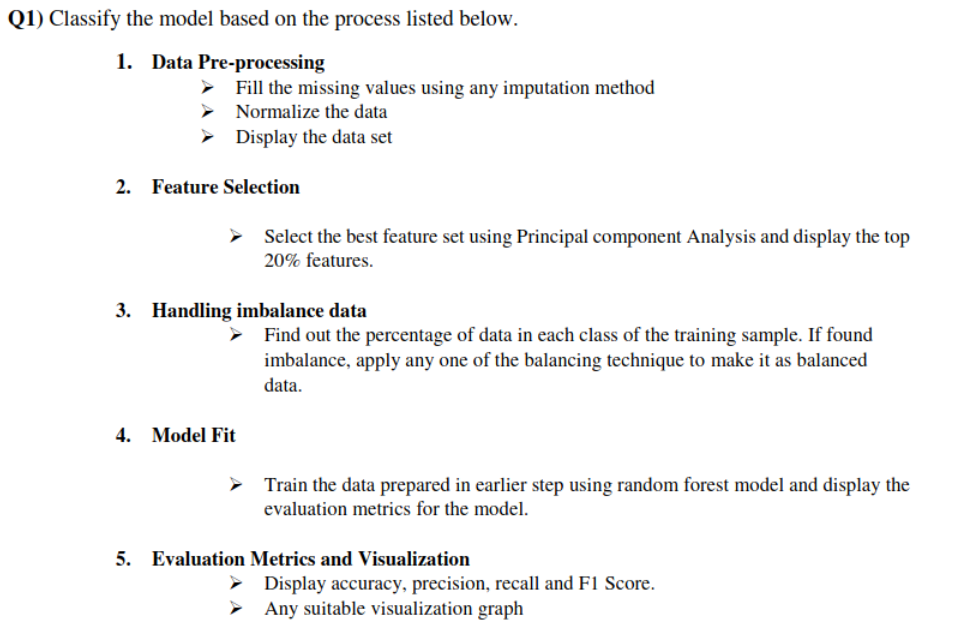

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
le = LabelEncoder()
data['Suburb'] = le.fit_transform(data['Suburb'])
data['Address'] = le.fit_transform(data['Address'])
data['Type'] = le.fit_transform(data['Type'])
data['SellerG'] = le.fit_transform(data['SellerG'])
data['Method'] = le.fit_transform(data['Method'])
data['Regionname'] = le.fit_transform(data['Regionname'])
data['CouncilArea'] = le.fit_transform(data['CouncilArea'])
data = data.drop('Date', axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0,12658,3,0,1490000.0,2,149,3067,2,4019.0,3.0,31
1,0,13968,3,0,1220000.0,2,186,3067,2,4019.0,3.0,31
2,0,2438,3,0,1420000.0,2,210,3067,2,4019.0,3.0,31
3,1,14945,3,0,1515000.0,2,22,3040,6,1543.0,7.5,22
4,2,17101,2,0,670000.0,2,210,3042,6,3464.0,10.4,22


In [3]:
missing_values_count = data.isnull().sum()
missing_values_count

Suburb              0
Address             0
Rooms               0
Type                0
Price            4244
Method              0
SellerG             0
Postcode            0
Regionname          0
Propertycount       1
Distance            1
CouncilArea         0
dtype: int64

In [4]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

print('Missing Data % = ', (total_missing/total_cells) * 100)

Missing Data % =  1.9420051225759238


In [5]:
imp = SimpleImputer()
data['Price'] = imp.fit_transform(data['Price'].values.reshape(-1, 1))
data['Propertycount'] = imp.fit_transform(data['Propertycount'].values.reshape(-1, 1))
data['Distance'] = imp.fit_transform(data['Distance'].values.reshape(-1, 1))

In [6]:
updated_missing_values_count = data.isnull().sum()
updated_missing_values_count

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18220 entries, 0 to 18219
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18220 non-null  int64  
 1   Address        18220 non-null  int64  
 2   Rooms          18220 non-null  int64  
 3   Type           18220 non-null  int64  
 4   Price          18220 non-null  float64
 5   Method         18220 non-null  int64  
 6   SellerG        18220 non-null  int64  
 7   Postcode       18220 non-null  int64  
 8   Regionname     18220 non-null  int64  
 9   Propertycount  18220 non-null  float64
 10  Distance       18220 non-null  float64
 11  CouncilArea    18220 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.7 MB


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0,12658,3,0,1490000.0,2,149,3067,2,4019.0,3.0,31
1,0,13968,3,0,1220000.0,2,186,3067,2,4019.0,3.0,31
2,0,2438,3,0,1420000.0,2,210,3067,2,4019.0,3.0,31
3,1,14945,3,0,1515000.0,2,22,3040,6,1543.0,7.5,22
4,2,17101,2,0,670000.0,2,210,3042,6,3464.0,10.4,22


In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
df = pd.DataFrame(data = principalComponents, columns = ['A', 'B'])
df

,A,B
0,510477.838426,-3809.597729
1,240478.335223,-5208.941172
2,440474.382824,6386.009801
3,535479.905165,-6050.467390
4,-309520.204593,-8515.458325
...,...,...
18215,-468526.157575,-3145.776443
18216,-339528.639244,4134.143767
18217,-589521.777651,-8515.057407
18218,2.188301,-4656.139493


In [9]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(df, data['Suburb'])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.25)

In [11]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(x_test)

In [13]:
print('Classification Report\n', classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       0.99      1.00      1.00       107
           2       0.92      0.98      0.95        88
           3       1.00      1.00      1.00        96
           4       0.96      1.00      0.98        93
           5       0.98      1.00      0.99        92
           6       0.92      1.00      0.96        82
           7       0.97      1.00      0.98        90
           8       1.00      1.00      1.00        92
           9       0.96      1.00      0.98        80
          10       0.99      1.00      1.00       100
          11       0.94      0.98      0.96        89
          12       0.99      0.96      0.97        81
          13       0.95      1.00      0.97        97
          14       0.96      1.00      0.98        79
          15       0.97      1.00      0.98        89
          16       1.00      1.00      1.00        96
    

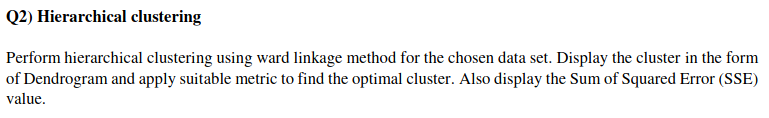

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
y = data['Gender']
x = data.drop(labels='Gender', axis=1)
x = normalize(x)
x = pd.DataFrame(x, columns=['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore'])

In [8]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

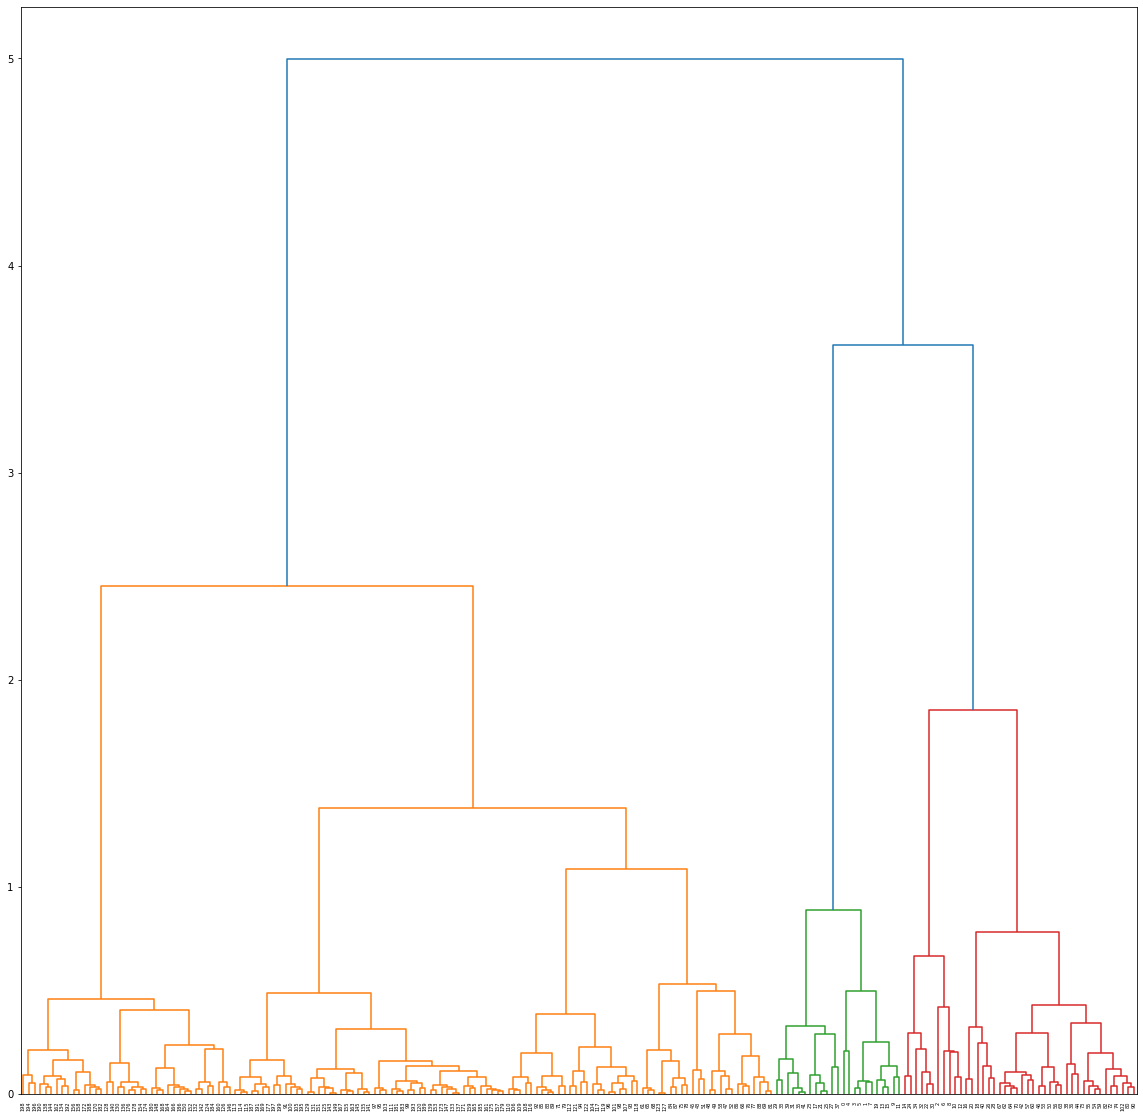

In [11]:
plt.figure(figsize=(20, 20))  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.show()